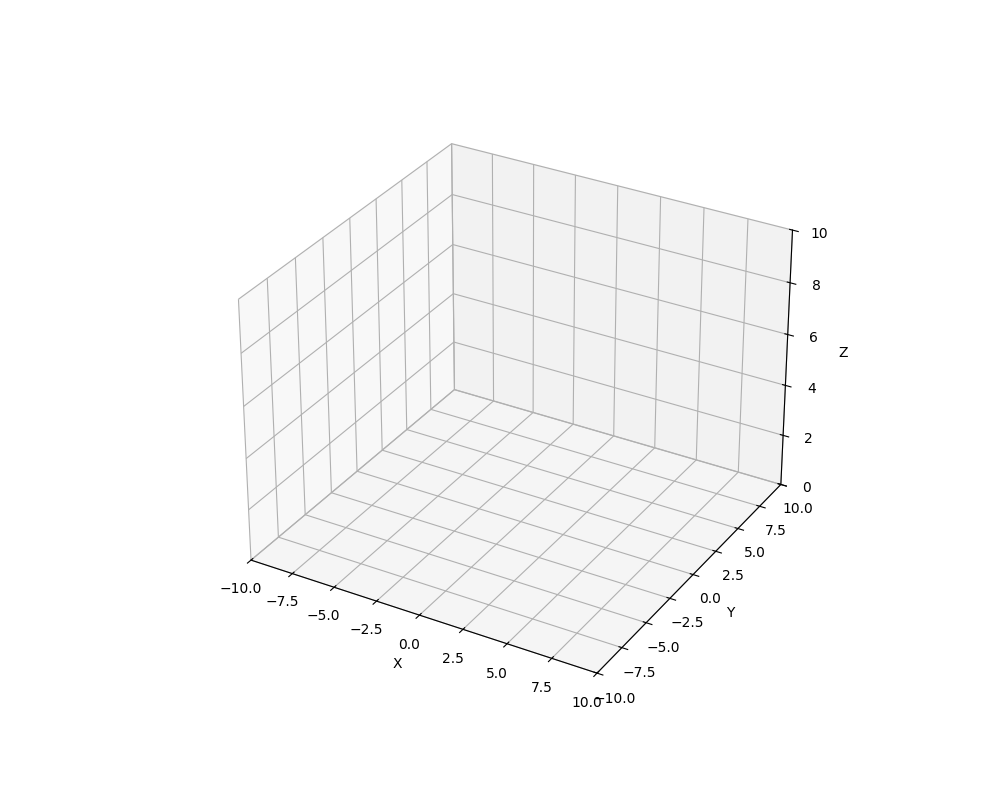

In [1]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 設定
n = 11  # グリッドサイズ
frames = 80  # アニメーションフレーム数
interval = 125  # フレーム間隔
snapshot_interval_sec = 2  # スナップショット間隔

# 11x11の2次元行列を作成
points = []
for i in range(n):
    for j in range(n):
        points.append([i - 5, j - 5, 0])  # Z座標を0に設定
points = np.array(points)

# プロット設定
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d")

# 軸設定
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(0, 10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# グリッド設定
ax.grid(True)

# スナップショットと現在のフレームの散布図を初期化
snapshots = []
snapshot_plots = []
current_scatter = ax.scatter([], [], [])


# アニメーション更新関数
def update(frame):
    global snapshots, snapshot_plots, current_scatter

    if frame == 0:
        # 初期化
        snapshots = []
        for snapshot_plot in snapshot_plots:
            snapshot_plot.remove()
        snapshot_plots.clear()

    angle = frame * 2 * np.pi / frames
    rotation_matrix = np.array(
        [
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1],
        ]
    )

    # 回転行列との積を求めて点を更新
    transformed = np.dot(points, rotation_matrix.T)
    transformed_x = transformed[:, 0]
    transformed_y = transformed[:, 1]
    transformed_z = [frame * interval / 1000] * len(transformed[:, 2])

    # 1秒ごとにスナップショットを追加
    if frame * interval % (1000 * snapshot_interval_sec) == 0:
        snapshots.append((transformed_x, transformed_y, transformed_z))
        snapshot_plot = ax.scatter(
            transformed_x, transformed_y, transformed_z, color="green", alpha=0.25
        )
        snapshot_plots.append(snapshot_plot)

    # 現在のフレームの散布図を更新
    current_scatter._offsets3d = (transformed_x, transformed_y, transformed_z)

    # すべてのプロットオブジェクトを返す
    return tuple(snapshot_plots + [current_scatter])


# アニメーションを作成
anim = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)

plt.show()
